### **Bag of n_grams: Exercise**

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.


### **About Data: Fake News Detection**

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**


In [31]:
#import libraies

import pandas as pd
import spacy
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt



In [2]:
#read both fake and true data set

df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

#Add the new column "label_num" which gives a unique number to each of these labels
df_true['lable'] = "Real"
df_true['lable_num'] = "1"
df_fake['lable'] = "Fake"
df_fake['lable_num'] = "0"

#balence data and decrese the num of them
min_samples = 5000
df_true_blanced = df_true.sample(min_samples, random_state = 2022)
df_fake_blanced = df_fake.sample(min_samples, random_state = 2022)

# marge them to create total data base

df = pd.concat([df_true_blanced,df_fake_blanced]).reset_index(drop=True)

# Shuffle the rows to ensure "Real" and "Fake" labels are interleaved
df = df.sample(frac=1, random_state=2022).reset_index(drop=True)


#print the shape of dataframe
df.shape

#print top 5 rows
df.head()

,title,text,subject,date,lable,lable_num
0,Trump Campaign Cops To Black Rally Goers: ‘Yo...,"Donald Trump is a flaming racist, and he has m...",News,"February 12, 2016",Fake,0
1,PRIVACY ALERT: YOUR VACUUM CLEANER IS SPYING O...,A fly on the wall? More like a spy on the floo...,politics,"Jul 26, 2017",Fake,0
2,Trump Will ANNHILILATE The Working Class He’s...,"Throughout his campaign, Trump repeatedly told...",News,"December 11, 2016",Fake,0
3,OBAMA READY TO DO BATTLE With America: Will “a...,Thanks to the funding our GOP majority Congres...,politics,"Jan 13, 2016",Fake,0
4,Houston port continues salvage efforts to reco...,HOUSTON (Reuters) - Salvage efforts continued ...,politicsNews,"September 4, 2017",Real,1


### **Modelling without Pre-processing Text data**

In [3]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.text,
    df.lable_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df.lable_num
)


In [4]:
#print the shapes of X_train and X_test
print(X_train.shape, X_test.shape)





(8000,) (2000,)


**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.


In [5]:
#unigram classification
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])



#2. fit with X_train and y_train

clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1000
           1       0.94      0.96      0.95      1000

    accuracy                           0.94      2000
   macro avg       0.95      0.95      0.94      2000
weighted avg       0.95      0.94      0.94      2000



In [6]:
#bigram classification
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1 , 2))),
    ('Multi NB', MultinomialNB())
])



#2. fit with X_train and y_train

clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred

y_pred = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1000
           1       0.95      0.97      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.


In [7]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),          #using the ngram_range parameter
     ('KNN', (KNeighborsClassifier(n_neighbors = 10, metric = 'cosine')))    #using the KNN classifier with 10 neighbors and cosine distance
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.95      0.71      1000
           1       0.85      0.28      0.42      1000

    accuracy                           0.62      2000
   macro avg       0.71      0.62      0.57      2000
weighted avg       0.71      0.62      0.57      2000




**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [20]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),          #using the ngram_range parameter
     ('random_forest', (RandomForestClassifier()))
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1000
           1       0.95      0.98      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000




**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier with an alpha value of 0.75.
- print the classification report.


In [21]:

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1 , 2))),
    ('Multi NB', MultinomialNB(alpha = 0.75))
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1000
           1       0.95      0.97      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [22]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [23]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_txt'] = df['text'].apply(preprocess)


In [26]:
#print the top 5 rows
df.head()

,title,text,subject,date,lable,lable_num,preprocessed_txt
0,Trump Campaign Cops To Black Rally Goers: ‘Yo...,"Donald Trump is a flaming racist, and he has m...",News,"February 12, 2016",Fake,0,Donald Trump flame racist secret history call ...
1,PRIVACY ALERT: YOUR VACUUM CLEANER IS SPYING O...,A fly on the wall? More like a spy on the floo...,politics,"Jul 26, 2017",Fake,0,fly wall like spy floor home turn dog isn t we...
2,Trump Will ANNHILILATE The Working Class He’s...,"Throughout his campaign, Trump repeatedly told...",News,"December 11, 2016",Fake,0,campaign Trump repeatedly tell brainwash U.S. ...
3,OBAMA READY TO DO BATTLE With America: Will “a...,Thanks to the funding our GOP majority Congres...,politics,"Jan 13, 2016",Fake,0,thank funding GOP majority Congress approve en...
4,Houston port continues salvage efforts to reco...,HOUSTON (Reuters) - Salvage efforts continued ...,politicsNews,"September 4, 2017",Real,1,HOUSTON Reuters salvage effort continue Monday...


**Build a model with pre processed text**

In [28]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.lable_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df.lable_num
)



**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [29]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (3, 3))),          #using the ngram_range parameter
     ('random_forest', (RandomForestClassifier()))
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1000
           1       0.95      0.81      0.87      1000

    accuracy                           0.88      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000



**Attempt2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, Bigram, and trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [25]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),          #using the ngram_range parameter
     ('random_forest', (RandomForestClassifier()))
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1000
           1       0.95      0.98      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



Text(95.72222222222221, 0.5, 'Truth')

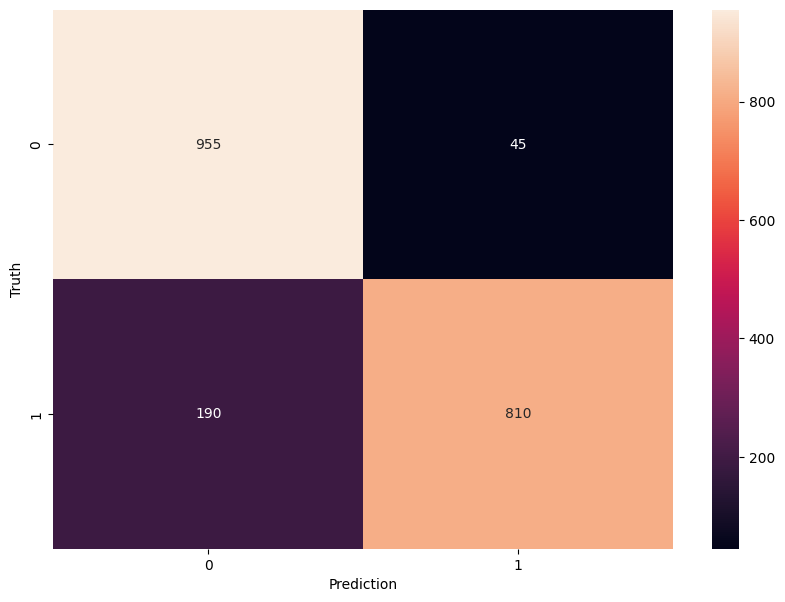

In [32]:
#finally print the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')


## **Please write down Final Observations**


## [**Solution**](./bag_of_n_grams_exercise_solutions.ipynb)